# Linear Regression

It is the linear combination of the predictor variables which produces the outcome or the dependent variable.

Dependent Variable/outcome $(y)$= $b_1$ $\times$ $x_1$ + $b_2$ $\times$ $x_2$ + $b_3$ $\times$ $x_3$  + c <br>
 where, **x1**, **x2** = independent variables or predictors, and **c** = bias <br>
        

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import random
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler
from sklearn.model_selection import train_test_split


%matplotlib inline

### The dataset has been obtained from UCI Machine Learning Repository which is available [here](http://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set).

In [2]:
df = pd.read_excel('Real_estate_valuation_data_set.xlsx')

df.head(3)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3


In [3]:
df = df.drop([df.columns[0]],axis=1)
df.head(3)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3


In [4]:
# Renaming Columns
df.columns=['txn_date', 'age', 'MRT_dist', 'Stores', 'lat', 'long', 'price/area']
df.head(3)

,txn_date,age,MRT_dist,Stores,lat,long,price/area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3


### PLOTS

a) Here we can see the price of the property has a **downward slope** with the increase of **dsitance from MRT**.<br> 
b) Where as in the cases of **AGE vs Price** the slope is not so dominant. <br> 
c) The **No. of stores vs Price** graph shows average increase of price as the number of stores increases.  

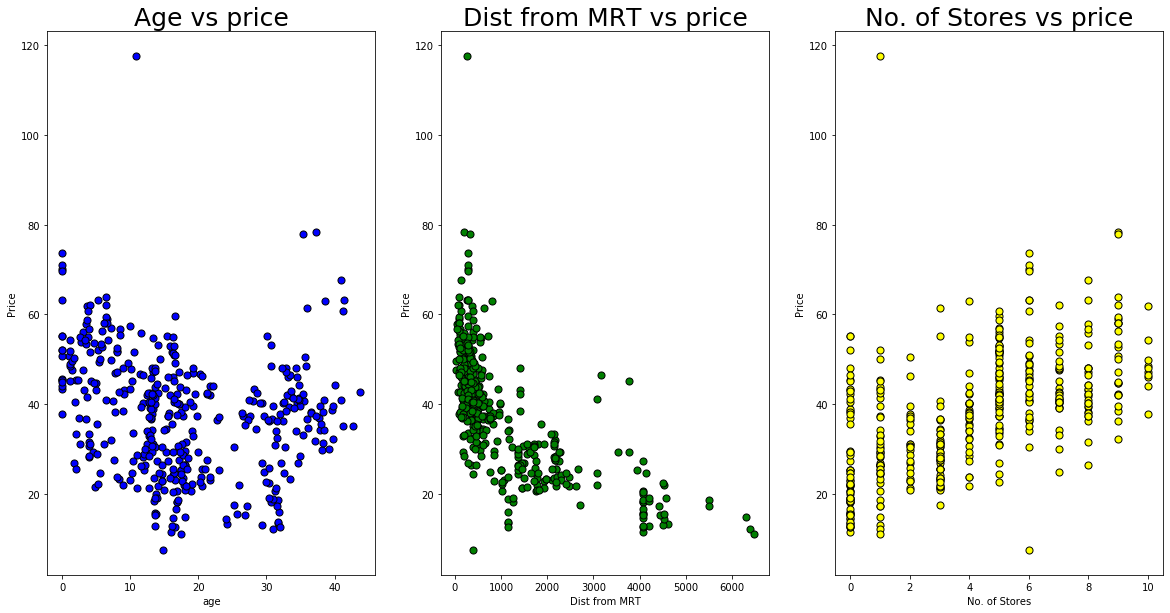

In [5]:
fig = plt.figure(figsize=(20,10))

plt.subplot(131)
plt.title('Age vs price', fontsize=25)
plt.scatter('age','price/area', data=df, c='blue', s=50,edgecolor='k')
plt.ylabel('Price')
plt.xlabel('age')

plt.subplot(132)
plt.title('Dist from MRT vs price', fontsize=25)
plt.scatter('MRT_dist','price/area', data=df, c='green', s=50,edgecolor='k')
plt.ylabel('Price')
plt.xlabel('Dist from MRT')

plt.subplot(133)
plt.title('No. of Stores vs price', fontsize=25)
plt.scatter('Stores','price/area', data=df, c='yellow', s=50,edgecolor='k')
plt.ylabel('Price')
plt.xlabel('No. of Stores')
plt.savefig('params_vs_price.png')
plt.show()

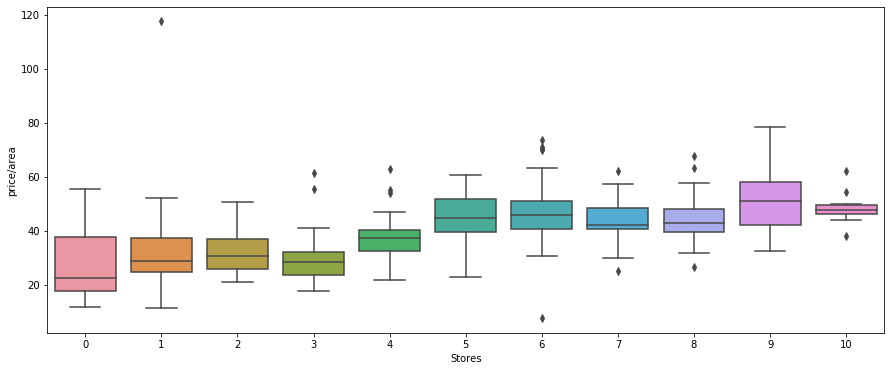

In [19]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='Stores',y='price/area',ax=ax,data=df)
plt.savefig('Stores_price_boxPLOT.png')


In [7]:
X = df.iloc[:,1:4] 
y = df.iloc[:,-1]

In [8]:
print(X)

      age    MRT_dist  Stores
0    32.0    84.87882      10
1    19.5   306.59470       9
2    13.3   561.98450       5
3    13.3   561.98450       5
4     5.0   390.56840       5
..    ...         ...     ...
409  13.7  4082.01500       0
410   5.6    90.45606       9
411  18.8   390.96960       7
412   8.1   104.81010       5
413   6.5    90.45606       9

[414 rows x 3 columns]


In [9]:
print(y)

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: price/area, Length: 414, dtype: float64


# Splitting the dataset into trainig and testing

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting into Linear regressor model 

In [11]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
print(regressor.intercept_, ' --> c')
print(regressor.coef_, '-->', 'b1,', 'b2,', 'b3')

43.27207889846268  --> c
[-0.25226931 -0.00537131  1.25037376] --> b1, b2, b3


In [13]:
y_pred = regressor.predict(X_test)

In [14]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result = result.reset_index(drop=True)
result

,Actual,Predicted
0,45.3,40.788330
1,14.4,12.898011
2,46.0,40.325667
3,15.6,12.537334
4,50.2,39.976758
...,...,...
78,53.0,43.832678
79,38.2,38.676893
80,46.7,44.108453
81,24.6,33.508367


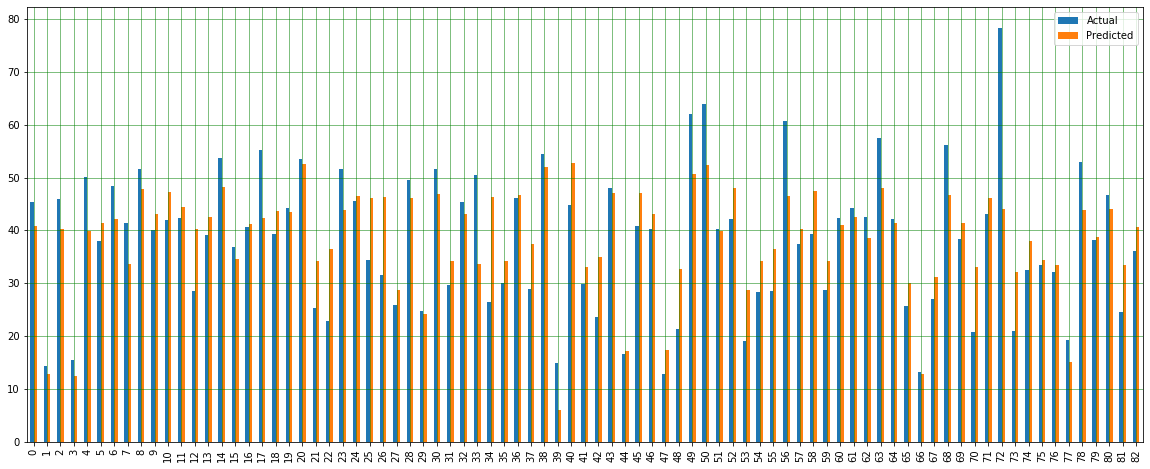

In [15]:
result.plot(kind='bar',figsize=(20,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig('pred_vs_true.png')

plt.show()

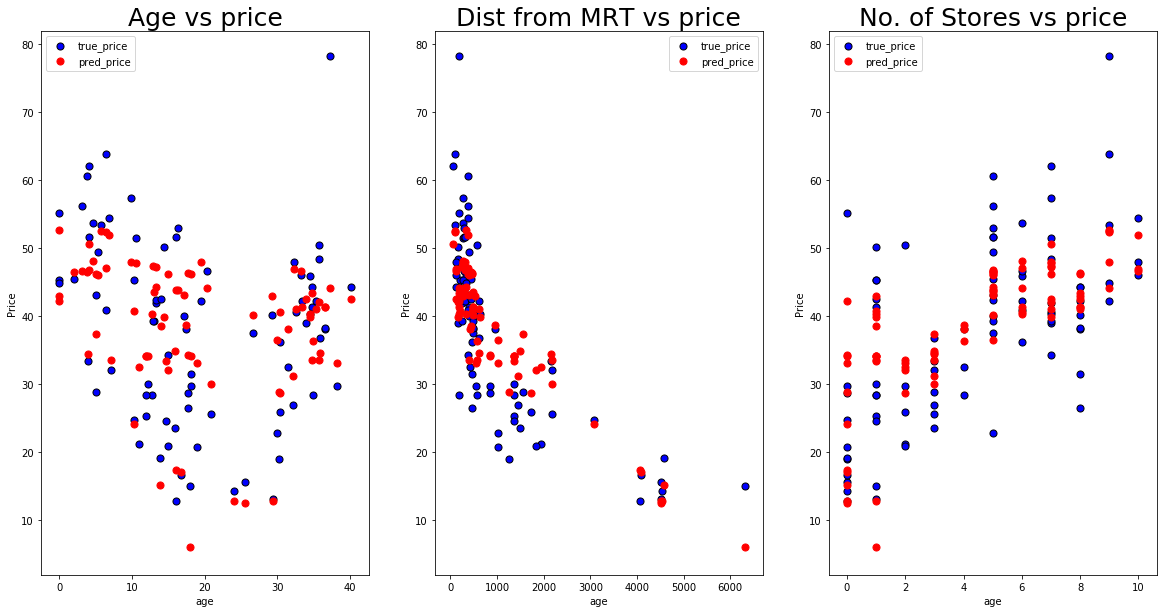

In [16]:
fig = plt.figure(figsize=(20,10))

plt.subplot(131)
plt.title('Age vs price', fontsize=25)
plt.scatter(X_test['age'],y_test, c='blue', s=50,edgecolor='k',label = 'true_price')
plt.scatter(X_test['age'], y_pred, c='r', s=50, label='pred_price')
plt.ylabel('Price')
plt.xlabel('age')
plt.legend()

plt.subplot(132)
plt.title('Dist from MRT vs price', fontsize=25)
plt.scatter(X_test['MRT_dist'],y_test, c='blue', s=50,edgecolor='k',label = 'true_price')
plt.scatter(X_test['MRT_dist'], y_pred, c='r', s=50, label='pred_price')
plt.ylabel('Price')
plt.xlabel('age')
plt.legend()

plt.subplot(133)
plt.title('No. of Stores vs price', fontsize=25)
plt.scatter(X_test['Stores'],y_test, c='blue', s=50,edgecolor='k',label = 'true_price')
plt.scatter(X_test['Stores'], y_pred, c='r', s=50, label='pred_price')
plt.ylabel('Price')
plt.xlabel('age')
plt.legend()



plt.show()


# Statistical Analysis of the performance metrics
### Errors

In [17]:
print(metrics.explained_variance_score(y_test, y_pred))
print(metrics.mean_absolute_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(metrics.mean_squared_log_error(y_test, y_pred))
print(metrics.median_absolute_error(y_test, y_pred))
print(metrics.r2_score(y_test, y_pred))
print(metrics.mean_poisson_deviance(y_test, y_pred))
print(metrics.mean_gamma_deviance(y_test, y_pred))


0.6243337022827553
6.09199174174306
8.100421227670923
0.05023876526119394
4.467648771779279
0.6222383595452838
1.71385038546053
0.05667465086607374


In [18]:
print(metrics.explained_variance_score(y_test, y_pred)*100)
print(metrics.r2_score(y_test, y_pred)*100)
print(metrics.mean_poisson_deviance(y_test, y_pred))
print(metrics.mean_gamma_deviance(y_test, y_pred))

62.43337022827553
62.22383595452838
1.71385038546053
0.05667465086607374
